# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Boston Housing dataset, which contains housing values in the suburbs of Boston. The Boston housing data is commonly used by aspiring Data Scientists.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `'train.csv'`) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create two new DataFrames based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't 
    - Create two new DataFrames based on a certain split for crime rate 
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This DataFrame contains the following columns:

- `crim`: per capita crime rate by town  
- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft  
- `indus`: proportion of non-retail business acres per town   
- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
- `nox`: nitrogen oxide concentration (parts per 10 million)   
- `rm`: average number of rooms per dwelling   
- `age`: proportion of owner-occupied units built prior to 1940  
- `dis`: weighted mean of distances to five Boston employment centers   
- `rad`: index of accessibility to radial highways   
- `tax`: full-value property-tax rate per \$10,000   
- `ptratio`: pupil-teacher ratio by town    
- `b`: 1000(Bk - 0.63)^2 where Bk is the proportion of African American individuals by town   
- `lstat`: lower status of the population (percent)   
- `medv`: median value of owner-occupied homes in $10000s 
  
    
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.


In [11]:
#Loading the data (which is stored in the file `'train.csv'`) 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('train.csv')
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [12]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [13]:
#Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables

#median of median value of owner-occupied homes in $10000s
print("The median value of owner-occupied homes in Boston is " + str(df['medv'].median()) + " in $10K units.")

#IQR of pupil:teacher ratio 
p25 = df["ptratio"].quantile(.25)
p75 = df["ptratio"].quantile(.75)

print("The IQR of the pupil:teacher ratio is " + str(round((p75 - p25), 2)) + ", with a median of " + str(df["ptratio"].median()) + ".")

#highest concentration of nitrogen oxide
print("The maximum concentration of nitrogen oxide in this area is " + str(df["nox"].max()))

The median value of owner-occupied homes in Boston is 21.6 in $10K units.
The IQR of the pupil:teacher ratio is 2.8, with a median of 19.0.
The maximum concentration of nitrogen oxide in this area is 0.871


In [14]:
age_sort_descending = df.sort_values(by = ["age"], ascending = False)
age_and_crim = age_sort_descending.loc[:, ["age", "crim"]]
age_and_crim_25 = age_and_crim.loc[age_and_crim["age"] < 45.4]
age_and_crim_75 = age_and_crim.loc[age_and_crim["age"] > 93.80]

In [15]:
age_and_crim_25

,age,crim
59,45.1,0.05188
51,45.0,0.09512
217,43.7,0.24103
41,43.4,0.12650
319,41.9,2.37857
...,...,...
24,6.6,0.14150
47,6.6,0.08826
25,6.5,0.15936
49,6.2,0.19539


In [58]:
age_and_crim_75

,age,crim
107,100.0,1.42502
243,100.0,4.89822
248,100.0,18.49820
247,100.0,11.10810
282,100.0,15.17720
...,...,...
5,94.3,0.22489
18,94.1,1.13081
105,94.0,2.44668
110,93.9,1.51902


Is there correlation between the proportion of owner-occupied units built prior to 1940 and the per capita crime rate? Home-ownership/occupation is a complex factor - a lower % may be indicative of a higher concentration of recently built, modernized homes and apartment buildings, or a more transient population.


<IPython.core.display.Javascript object>


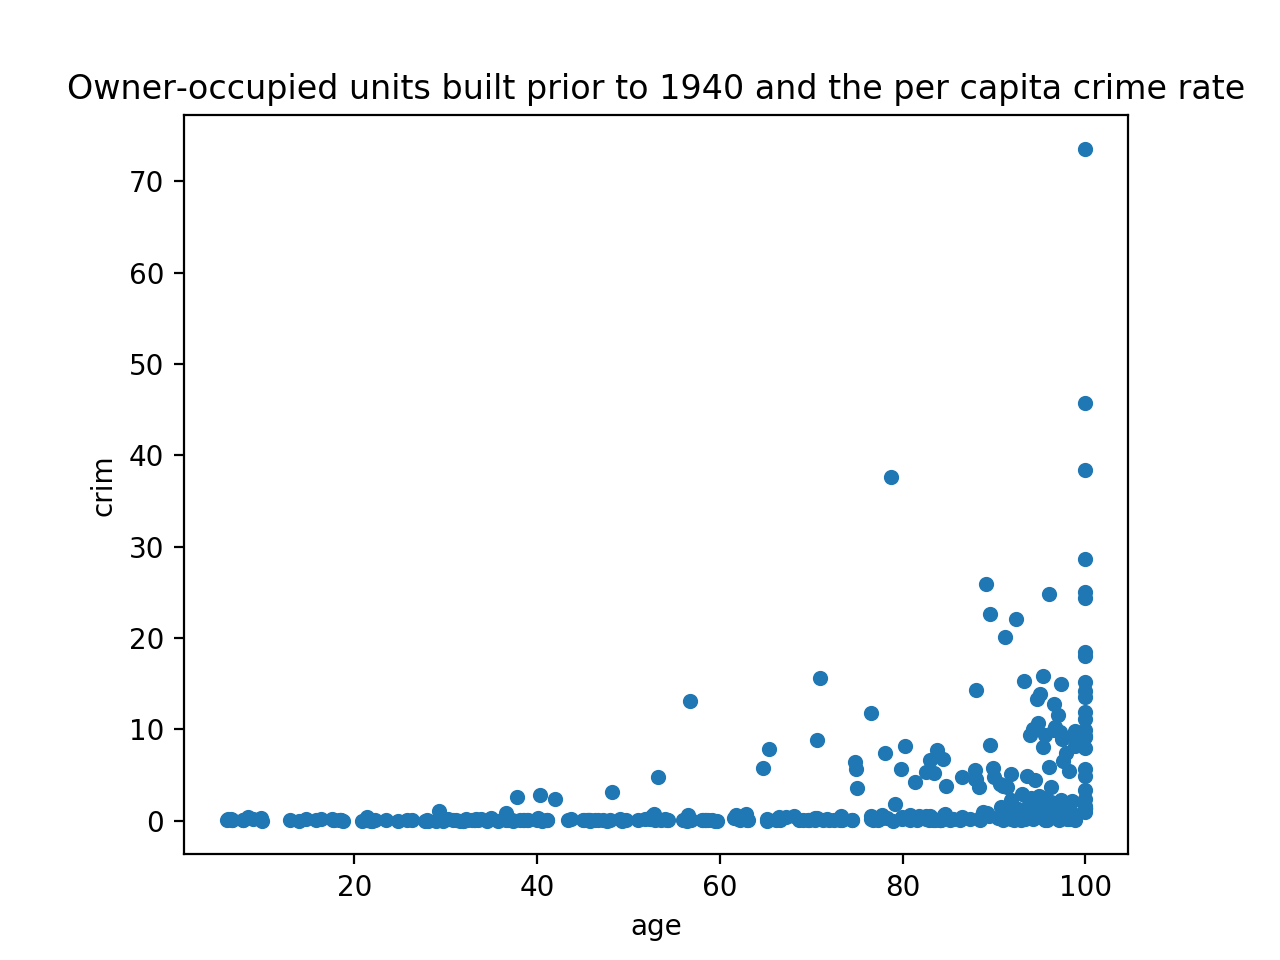

Text(0.5, 1.0, 'Owner-occupied units built prior to 1940 and the per capita crime rate')

In [84]:
print("Is there correlation between the proportion of owner-occupied units built prior to 1940 and the per capita crime rate? Home-ownership/occupation is a complex factor - a lower % may be indicative of a higher concentration of recently built, modernized homes and apartment buildings, or a more transient population.")
age_and_crim_plot = age_and_crim.plot.scatter("age", "crim")
age_and_crim_plot.set_aspect('equal')
age_and_crim_plot.set_title("Owner-occupied units built prior to 1940 and the per capita crime rate")

Text(0.5, 1.0, 'Accessibility Index v. Median Home Values')

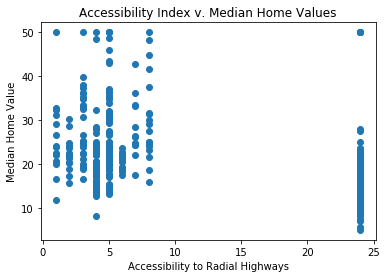

In [17]:
plt.scatter(df['rad'], df['medv'])
plt.xlabel('Accessibility to Radial Highways')
plt.ylabel('Median Home Value')
plt.title('Accessibility Index v. Median Home Values')

Text(0.5, 1.0, 'Number of homes by proportion of residential land zoned for lots over 25K SQFT')

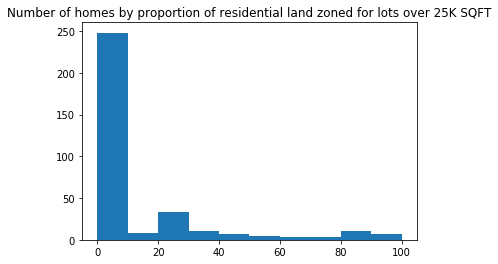

In [20]:
plt.hist(df['zn'])
plt.title('Number of homes by proportion of residential land zoned for lots over 25K SQFT')

Text(0.5, 1.0, 'Parent:Teacher v. Tax Rate Per $10K')

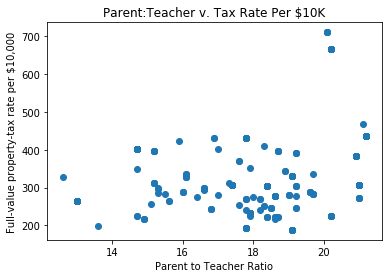

In [21]:
plt.scatter(df['ptratio'], df['tax'])
plt.xlabel('Parent to Teacher Ratio')
plt.ylabel('Full-value property-tax rate per $10,000')
plt.title('Parent:Teacher v. Tax Rate Per $10K')

In [25]:
df.rm.value_counts()

6.229    3
6.127    3
6.635    2
5.304    2
5.983    2
        ..
5.454    1
5.965    1
5.871    1
5.887    1
6.250    1
Name: rm, Length: 308, dtype: int64

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!